# Maximum Classifier
Just predicts 0 for everything

In [1]:
! pip install -U scikit-learn
! pip install matplotlib
! pip install pandas
! pip install numpy
! pip install scikit-plot
! pip install scipy==1.11.4
! pip install seaborn

In [8]:
import pickle
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scikitplot as skplt
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from collections import Counter

## Load data

In [9]:
with open('/Users/shreyanakum/Documents/CS178/CS-178-Project/DATA/tfidf_data.pkl', 'rb') as f:
    tfidf_data = pickle.load(f)

X_train_tfidf = tfidf_data['X_train']
X_test_tfidf = tfidf_data['X_test']
y_train_tfidf = tfidf_data['y_train']
y_test_tfidf = tfidf_data['y_test']
vectorizer_tfidf = tfidf_data['vectorizer']

In [10]:
with open('/Users/shreyanakum/Documents/CS178/CS-178-Project/DATA/count_data.pkl', 'rb') as f:
    count_data = pickle.load(f)

X_train_count = count_data['X_train']
X_test_count = count_data['X_test']
y_train_count = count_data['y_train']
y_test_count = count_data['y_test']
vectorizer_count = count_data['vectorizer']

## Results

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# For TF–IDF data
y_train_tfidf_flat = np.array(y_train_tfidf).ravel()
y_test_tfidf_flat  = np.array(y_test_tfidf).ravel()

majority_class_tfidf = Counter(y_train_tfidf_flat).most_common(1)[0][0]
print("Majority class (TF-IDF):", majority_class_tfidf)

# For Counts data
y_train_cont_flat = np.array(y_train_count).ravel()
y_test_cnt_flat  = np.array(y_test_count).ravel()

majority_class_count = Counter(y_train_cont_flat).most_common(1)[0][0]
print("Majority class (TF-IDF):", majority_class_count)


Majority class (TF-IDF): 0
Majority class (TF-IDF): 0


### TF-IDF

In [13]:
y_train_pred_tfidf = np.full_like(y_train_tfidf, fill_value=majority_class_tfidf)
y_test_pred_tfidf  = np.full_like(y_test_tfidf,  fill_value=majority_class_tfidf)

train_acc_tfidf = accuracy_score(y_train_tfidf, y_train_pred_tfidf)
test_acc_tfidf  = accuracy_score(y_test_tfidf,  y_test_pred_tfidf)

train_f1_tfidf = f1_score(y_train_tfidf, y_train_pred_tfidf, average='weighted')
test_f1_tfidf  = f1_score(y_test_tfidf,  y_test_pred_tfidf,  average='weighted')

print("TF-IDF majority baseline:")
print(f"  Train accuracy: {train_acc_tfidf}")
print(f"  Train F1 (weighted): {train_f1_tfidf}")
print(f"  Test accuracy: {test_acc_tfidf}")
print(f"  Test F1 (weighted): {test_f1_tfidf}")


TF-IDF majority baseline:
  Train accuracy: 0.8983126527542771
  Train F1 (weighted): 0.0
  Test accuracy: 0.898355005483315
  Test F1 (weighted): 0.0


### Count Vectorizer

In [22]:
y_train_pred_count = np.full_like(y_train_count, fill_value=majority_class_count)
y_test_pred_count  = np.full_like(y_test_count,  fill_value=majority_class_count)

train_acc_count = accuracy_score(y_train_count, y_train_pred_count)
test_acc_count  = accuracy_score(y_test_count,  y_test_pred_count)

train_f1_count = f1_score(y_train_count, y_train_pred_count, average='weighted')
test_f1_count  = f1_score(y_test_count,  y_test_pred_count,  average='weighted')

print("Count majority baseline:")
print(f"  Train accuracy: {train_acc_count}")
print(f"  Train F1 (weighted): {train_f1_count}")
print(f"  Test accuracy: {test_acc_count}")
print(f"  Test F1 (weighted): {test_f1_count}")

Count majority baseline:
  Train accuracy: 0.8983126527542771
  Train F1 (weighted): 0.0
  Test accuracy: 0.898355005483315
  Test F1 (weighted): 0.0


In [23]:
print(classification_report(y_test_count,  y_test_pred_count))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3056
           1       0.00      0.00      0.00       321
           2       0.00      0.00      0.00      1715
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00      1614
           5       0.00      0.00      0.00       294

   micro avg       0.00      0.00      0.00      7074
   macro avg       0.00      0.00      0.00      7074
weighted avg       0.00      0.00      0.00      7074
 samples avg       0.00      0.00      0.00      7074



/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control th

## Visualization

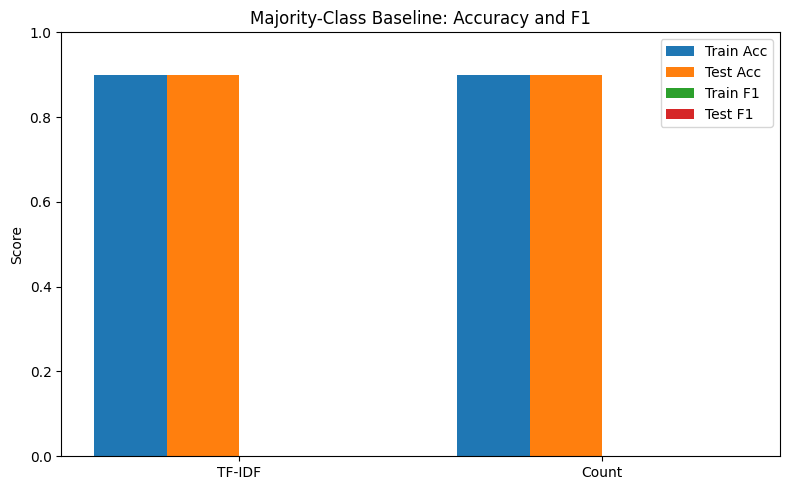

In [25]:
methods = ['TF-IDF', 'Count']
train_accs = [train_acc_tfidf, train_acc_count]
test_accs  = [test_acc_tfidf,  test_acc_count]
train_f1s  = [train_f1_tfidf,  train_f1_count]
test_f1s   = [test_f1_tfidf,   test_f1_count]

x = np.arange(len(methods))
width = 0.2

plt.figure(figsize=(8, 5))
plt.bar(x - 1.5*width, train_accs, width, label='Train Acc')
plt.bar(x - 0.5*width, test_accs,  width, label='Test Acc')
plt.bar(x + 0.5*width, train_f1s,  width, label='Train F1')
plt.bar(x + 1.5*width, test_f1s,   width, label='Test F1')

plt.xticks(x, methods)
plt.ylim(0, 1.0)
plt.ylabel('Score')
plt.title('Majority-Class Baseline: Accuracy and F1')
plt.legend()
plt.tight_layout()
plt.show()
